In [3]:
import pandas as pd
import numpy as np

In [4]:
'''A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. Steps below (refer below
diagram for understanding):
• Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy.mean() function for finding the average vector for all
vectors in a given class. Please define the axis property appropriately to use this function. EX:
feat_vecs.mean(axis=0))
• Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy.std() function for finding the standard deviation vector
for all vectors in a given class. Please define the axis property appropriately to use this
function.)
• Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean
distance between two centroids.)'''

'A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If\nyour data deals with multiple classes, you can take any two classes. Steps below (refer below\ndiagram for understanding):\n• Calculate the mean for each class (also called as class centroid)\n(Suggestion: You may use numpy.mean() function for finding the average vector for all\nvectors in a given class. Please define the axis property appropriately to use this function. EX:\nfeat_vecs.mean(axis=0))\n• Calculate spread (standard deviation) for each class\n(Suggestion: You may use numpy.std() function for finding the standard deviation vector\nfor all vectors in a given class. Please define the axis property appropriately to use this\nfunction.)\n• Calculate the distance between mean vectors between classes\n(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean\ndistance between two centroids.)'

In [5]:
df = pd.read_csv('/Users/triahavijayekkumaran/downloads/nearest-earth-objects(1910-2024) 2.csv')

In [6]:
features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

In [7]:
df = df[features + ['is_hazardous']].dropna()

In [8]:
X = df[features].values
y = df['is_hazardous'].values

In [9]:
y = y.astype(int)

In [10]:
class_non_hazardous = X[y == 0]
class_hazardous = X[y == 1]

In [11]:
centroid_non_hazardous = np.mean(class_non_hazardous, axis=0)
centroid_hazardous = np.mean(class_hazardous, axis=0)

In [12]:
spread_non_hazardous = np.std(class_non_hazardous, axis=0)
spread_hazardous = np.std(class_hazardous, axis=0)

In [13]:
interclass_distance = np.linalg.norm(centroid_non_hazardous - centroid_hazardous)

In [14]:
print("Non-Hazardous NEOs Centroid:", centroid_non_hazardous)
print("Hazardous NEOs Centroid:", centroid_hazardous)
print("Spread (Standard Deviation) of Non-Hazardous NEOs:", spread_non_hazardous)
print("Spread (Standard Deviation) of Hazardous NEOs:", spread_hazardous)
print("Interclass Distance between Non-Hazardous and Hazardous NEOs:", interclass_distance)

Non-Hazardous NEOs Centroid: [2.33155792e+01 1.38020958e-01 3.08624245e-01 4.91713470e+04
 4.15874595e+07]
Hazardous NEOs Centroid: [2.03143783e+01 2.93082636e-01 6.55352698e-01 6.39689411e+04
 4.11801528e+07]
Spread (Standard Deviation) of Non-Hazardous NEOs: [2.88136243e+00 3.11453612e-01 6.96431449e-01 2.56578049e+04
 2.07646200e+07]
Spread (Standard Deviation) of Hazardous NEOs: [1.34140733e+00 2.96545108e-01 6.63095020e-01 2.77483732e+04
 2.08351818e+07]
Interclass Distance between Non-Hazardous and Hazardous NEOs: 407575.39446004253


In [15]:
'''A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.
(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be
achieved with matplotlib.pyplot.hist())'''

'A2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the\nhistogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and\nvariance from the available data.\n(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be\nachieved with matplotlib.pyplot.hist())'

In [16]:
import matplotlib.pyplot as plt

In [17]:
feature = 'relative_velocity'

In [18]:
data = df[feature].dropna()

In [19]:
hist, bin_edges = np.histogram(data, bins=10)

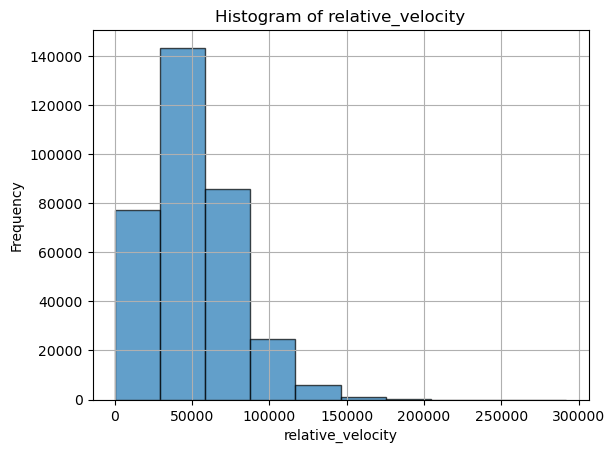

In [20]:
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)  # You can adjust the number of bins here too
plt.xlabel('relative_velocity')
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature}')
plt.grid(True)
plt.show()

In [21]:
mean_value = np.mean(data)
variance_value = np.var(data)

In [22]:
print(f"Mean of {feature}: {mean_value}")
print(f"Variance of {feature}: {variance_value}")

Mean of relative_velocity: 51060.01799447809
Variance of relative_velocity: 696953864.4975481


In [23]:
'''Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph.'''

'Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1\nto 10. Make a plot of the distance and observe the nature of this graph.'

In [24]:
from scipy.spatial import distance

In [25]:
feature1 = 'absolute_magnitude'
feature2 = 'relative_velocity'

In [26]:
vector1 = df[feature1].dropna().values
vector2 = df[feature2].dropna().values

In [27]:
min_length = min(len(vector1), len(vector2))
vector1 = vector1[:min_length]
vector2 = vector2[:min_length]

In [28]:
r_values = list(range(1, 11))
minkowski_distances = [distance.minkowski(vector1, vector2, r) for r in r_values]

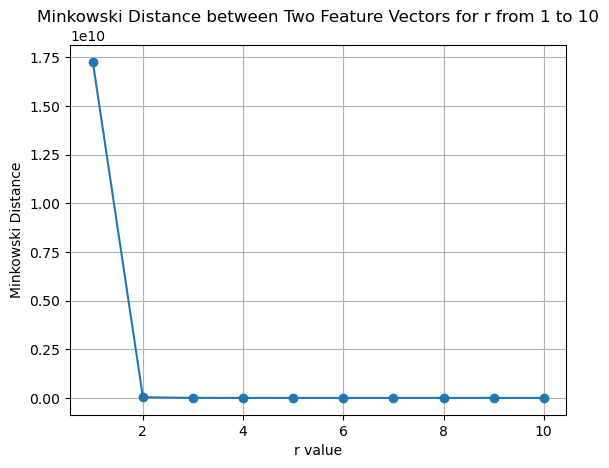

In [29]:
plt.plot(r_values, minkowski_distances, marker='o')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors for r from 1 to 10')
plt.grid(True)
plt.show()

In [30]:
for r, dist in zip(r_values, minkowski_distances):
    print(f"Minkowski distance with r={r}: {dist}")

Minkowski distance with r=1: 17259262230.312656
Minkowski distance with r=2: 33415116.23075527
Minkowski distance with r=3: 4419682.32703473
Minkowski distance with r=4: 1666299.0562133223
Minkowski distance with r=5: 951468.7779986416
Minkowski distance with r=6: 667713.4027153093
Minkowski distance with r=7: 527386.101056924
Minkowski distance with r=8: 449139.7392262055
Minkowski distance with r=9: 402727.477114773
Minkowski distance with r=10: 374323.68971661216


In [31]:
'''A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit. See below sample code for help:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X is the feature vector set for your project and y is the class levels for vectors present in X.
Note: Before set split, make sure you have only two classes. If your project deals with multi-class
problem, take any two classes from them.'''

'A4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the traintest_split() function available in SciKit. See below sample code for help:\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)\nX is the feature vector set for your project and y is the class levels for vectors present in X.\nNote: Before set split, make sure you have only two classes. If your project deals with multi-class\nproblem, take any two classes from them.'

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
features = ['absolute_magnitude', 'relative_velocity']
target = 'is_hazardous'

In [34]:
X = df[features].dropna()
y = df[target].dropna().astype(int)

In [35]:
X = X.loc[y.index]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Test set labels shape:", y_test.shape)

Training set size: 236719
Test set size: 101452
Training set features shape: (236719, 2)
Test set features shape: (101452, 2)
Training set labels shape: (236719,)
Test set labels shape: (101452,)


In [38]:
'''A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. '''

'A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. '

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_train_pred = knn.predict(X_train)

In [43]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the kNN classifier with k=3 (for example)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8401312936166857
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     88613
           1       0.31      0.21      0.25     12839

    accuracy                           0.84    101452
   macro avg       0.60      0.57      0.58    101452
weighted avg       0.82      0.84      0.83    101452



In [45]:
print(f"Accuracy of kNN Classifier (k=3) on Training Set: {train_accuracy}")
print("\nConfusion Matrix (Training Set):\n", train_confusion_matrix)
print("\nClassification Report (Training Set):\n", train_classification_report)

Accuracy of kNN Classifier (k=3) on Training Set: 0.9111689386994707

Confusion Matrix (Training Set):
 [[200321   6075]
 [ 14953  15370]]

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    206396
           1       0.72      0.51      0.59     30323

    accuracy                           0.91    236719
   macro avg       0.82      0.74      0.77    236719
weighted avg       0.90      0.91      0.90    236719



kNN Classifier (k=3) Accuracy: 0.8401312936166857

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     88613
           1       0.31      0.21      0.25     12839

    accuracy                           0.84    101452
   macro avg       0.60      0.57      0.58    101452
weighted avg       0.82      0.84      0.83    101452



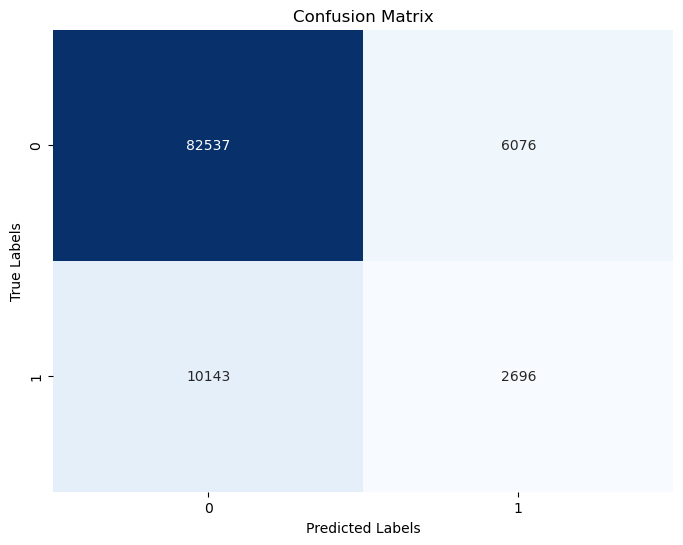

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_pred and y_test are already defined

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print accuracy
print("kNN Classifier (k=3) Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:\n", class_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [47]:
'''Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.
>>> neigh.score(X_test, y_test)'''

'Test the accuracy of the kNN using the test set obtained from above exercise. Following code for\nhelp.\n>>> neigh.score(X_test, y_test)'

In [48]:
accuracy = knn.score(X_test, y_test)

In [49]:
print("Accuracy of kNN Classifier (k=3) on Test Set:", accuracy)

Accuracy of kNN Classifier (k=3) on Test Set: 0.8401312936166857


In [50]:
'''A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.
>>> neigh.predict(X_test)
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).'''

'A7. Use the predict() function to study the prediction behavior of the classifier for test vectors.\nneigh.predict(X_test)\nPerform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the\nclass of the test vector (test_vect is any feature vector from your test set).'

In [51]:
print("Predicted Classes for the Test Set:")
print(y_pred)

Predicted Classes for the Test Set:
[0 0 0 ... 0 0 0]


In [52]:
test_vect = X_test.iloc[0].values.reshape(1, -1)  # Reshape for a single prediction
predicted_class = knn.predict(test_vect)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [53]:
print(f"\nPredicted Class for the given test vector {test_vect.flatten()}: {predicted_class[0]}")


Predicted Class for the given test vector [   26.        20674.6051094]: 0


In [54]:
'''A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.'''

'A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to\n11 and make an accuracy plot.'

In [55]:
accuracies = []

In [56]:
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy:.4f}")


Accuracy with k=1: 0.8263
Accuracy with k=2: 0.8604
Accuracy with k=3: 0.8401
Accuracy with k=4: 0.8622
Accuracy with k=5: 0.8512
Accuracy with k=6: 0.8651
Accuracy with k=7: 0.8587
Accuracy with k=8: 0.8676
Accuracy with k=9: 0.8636
Accuracy with k=10: 0.8693
Accuracy with k=11: 0.8672


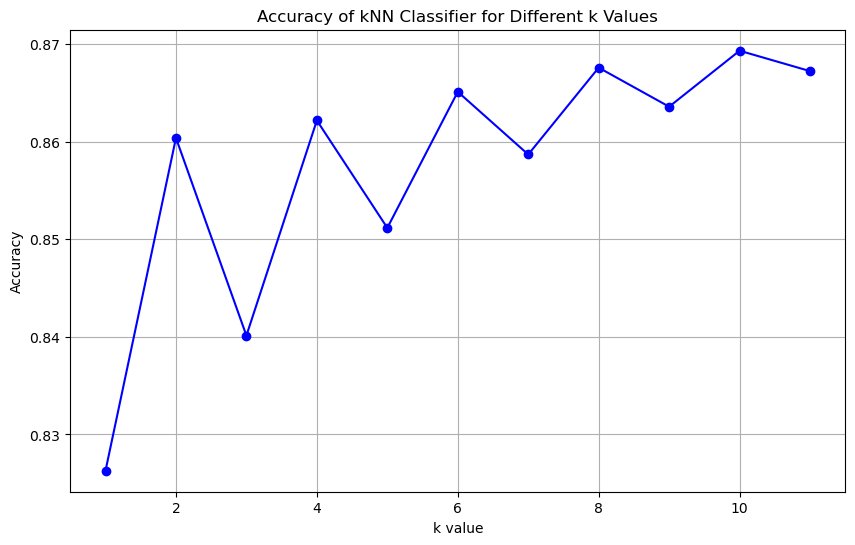

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.grid(True)
plt.show()

In [58]:
'''A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).'''

'A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the\nother performance metrics such as precision, recall and F1-Score measures for both training and test\ndata. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).'

In [59]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [60]:
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

Confusion Matrix for Training Data:
[[204661   1735]
 [ 27558   2765]]


In [61]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)


Confusion Matrix for Test Data:
[[87468  1145]
 [12324   515]]


In [62]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    206396
           1       0.61      0.09      0.16     30323

    accuracy                           0.88    236719
   macro avg       0.75      0.54      0.55    236719
weighted avg       0.85      0.88      0.83    236719



In [63]:
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     88613
           1       0.31      0.04      0.07     12839

    accuracy                           0.87    101452
   macro avg       0.59      0.51      0.50    101452
weighted avg       0.80      0.87      0.82    101452



In [64]:
'''Create a normal distribution data, plot the graph and compare the normal distribution plot
against the histogram plot.'''

'Create a normal distribution data, plot the graph and compare the normal distribution plot\nagainst the histogram plot.'

In [65]:
import seaborn as sns

In [66]:
mean = 0 
std_dev = 1
num_samples = 1000  

In [67]:
normal_data = np.random.normal(mean, std_dev, num_samples)

In [68]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: ylabel='Density'>

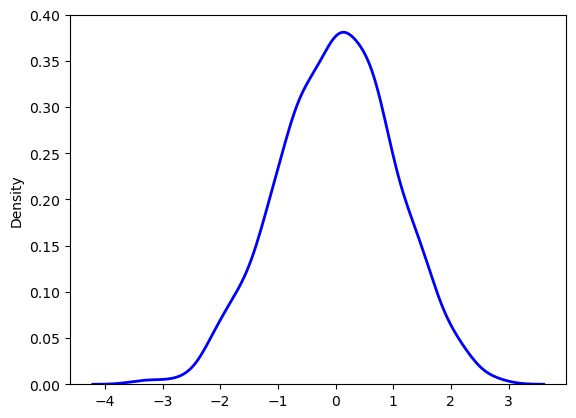

In [69]:
sns.kdeplot(normal_data, color='blue', label='Normal Distribution (KDE)', linewidth=2)

(array([0.00476312, 0.00952624, 0.        , 0.00952624, 0.00952624,
        0.0238156 , 0.06668368, 0.08097304, 0.119078  , 0.10002552,
        0.19528793, 0.21910353, 0.25244537, 0.36676025, 0.31436593,
        0.34294465, 0.41915458, 0.36676025, 0.36676025, 0.36676025,
        0.31912905, 0.17623545, 0.18576169, 0.17147233, 0.11431488,
        0.0476312 , 0.0714468 , 0.0238156 , 0.00952624, 0.00952624]),
 array([-3.44930366, -3.23935724, -3.02941083, -2.81946442, -2.609518  ,
        -2.39957159, -2.18962518, -1.97967876, -1.76973235, -1.55978594,
        -1.34983952, -1.13989311, -0.9299467 , -0.72000028, -0.51005387,
        -0.30010746, -0.09016104,  0.11978537,  0.32973178,  0.5396782 ,
         0.74962461,  0.95957103,  1.16951744,  1.37946385,  1.58941027,
         1.79935668,  2.00930309,  2.21924951,  2.42919592,  2.63914233,
         2.84908875]),
 <BarContainer object of 30 artists>)

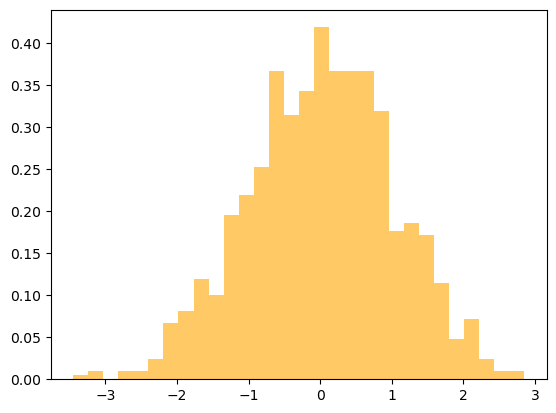

In [70]:
plt.hist(normal_data, bins=30, density=True, color='orange', alpha=0.6, label='Histogram')

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [72]:
y_train_pred = knn.predict(X_train)

In [73]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [74]:
accuracy_train = accuracy_score(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

In [75]:
print("Training Data Evaluation")
print("========================")
print("kNN Classifier (k=3) Accuracy on Training Data:", accuracy_train)
print("\nConfusion Matrix (Training Data):\n", conf_matrix_train)
print("\nClassification Report (Training Data):\n", class_report_train)

Training Data Evaluation
kNN Classifier (k=3) Accuracy on Training Data: 0.8762541240880538

Confusion Matrix (Training Data):
 [[204661   1735]
 [ 27558   2765]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.88      0.99      0.93    206396
           1       0.61      0.09      0.16     30323

    accuracy                           0.88    236719
   macro avg       0.75      0.54      0.55    236719
weighted avg       0.85      0.88      0.83    236719



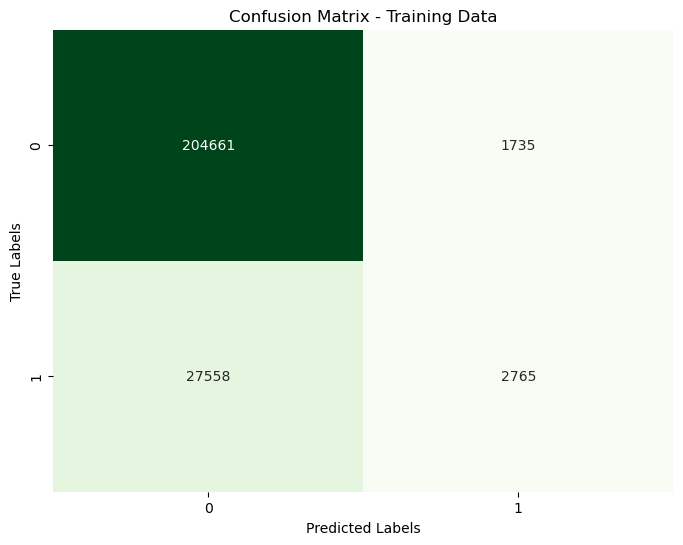

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [77]:
conf_matrix_test = confusion_matrix(y_test, y_pred)

In [78]:
accuracy_test = accuracy_score(y_test, y_pred)
class_report_test = classification_report(y_test, y_pred)

In [79]:
print("Test Data Evaluation")
print("========================")
print("kNN Classifier (k=3) Accuracy on Test Data:", accuracy_test)
print("\nConfusion Matrix (Test Data):\n", conf_matrix_test)
print("\nClassification Report (Test Data):\n", class_report_test)

Test Data Evaluation
kNN Classifier (k=3) Accuracy on Test Data: 0.8672377084729724

Confusion Matrix (Test Data):
 [[87468  1145]
 [12324   515]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     88613
           1       0.31      0.04      0.07     12839

    accuracy                           0.87    101452
   macro avg       0.59      0.51      0.50    101452
weighted avg       0.80      0.87      0.82    101452



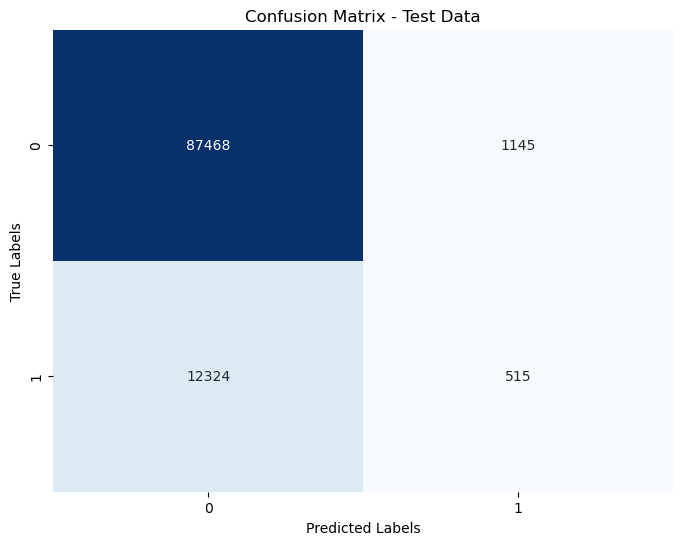

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [81]:
'''A good fit for Class 0 (non-hazardous) is shown by the model, with high precision, recall, and F1-scores across both training and test sets.

Underfitting of Class 1: The model seems to underfit with respect to Class 1 (hazardous) since it does an overall poor job at identifying such cases, which is evident from the very low recall and F1-scores. It can be concluded that the model needs better hyperparameter tuning, more balanced data, or perhaps a completely different approach, such as adjusting class weights, using a different model, or feature engineering, to better handle the hazardous class.'''


'A good fit for Class 0 (non-hazardous) is shown by the model, with high precision, recall, and F1-scores across both training and test sets.\n\nUnderfitting of Class 1: The model seems to underfit with respect to Class 1 (hazardous) since it does an overall poor job at identifying such cases, which is evident from the very low recall and F1-scores. It can be concluded that the model needs better hyperparameter tuning, more balanced data, or perhaps a completely different approach, such as adjusting class weights, using a different model, or feature engineering, to better handle the hazardous class.'

In [82]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

In [83]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [84]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [85]:
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

In [86]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [87]:
print("Training Data Evaluation")
print("========================")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAPE: {mape_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation")
print("========================")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}")
print(f"R²: {r2_test}")

Training Data Evaluation
MSE: 0.12374587591194623
RMSE: 0.35177532021440366
MAPE: 33008526368765.664
R²: -0.10795858477866727

Test Data Evaluation
MSE: 0.13276229152702756
RMSE: 0.3643656014596158
MAPE: 50828190408658.58
R²: -0.20106725598825737


In [88]:
'''The negative R² values on both the training and test sets suggest that the model is significantly underfitting the data. In other words, this may imply that the model is too simple or not correctly parameterized to capture the patterns in the data, leading to poor predictive performance. The extraordinarily high MAPE values indicate that there might be some problem with data preprocessing, the model itself, or the presence of outliers or extreme values causing very large percentage errors.'''

'The negative R² values on both the training and test sets suggest that the model is significantly underfitting the data. In other words, this may imply that the model is too simple or not correctly parameterized to capture the patterns in the data, leading to poor predictive performance. The extraordinarily high MAPE values indicate that there might be some problem with data preprocessing, the model itself, or the presence of outliers or extreme values causing very large percentage errors.'

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
np.random.seed(42)

In [91]:
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

In [92]:
classes = np.random.choice([0, 1], 20)

In [93]:
colors = np.where(classes == 0, 'blue', 'pink')

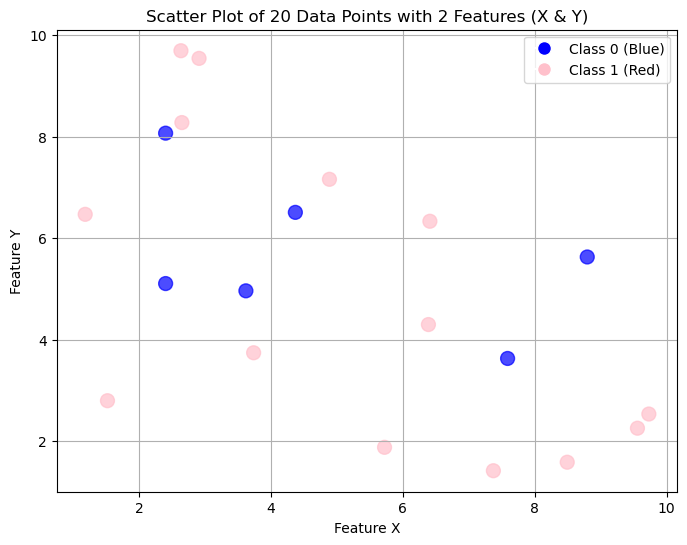

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=colors, s=100, alpha=0.7)
plt.title("Scatter Plot of 20 Data Points with 2 Features (X & Y)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (Blue)'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Class 1 (Red)')])

plt.show()

In [95]:
import numpy as np

In [96]:
x_test_values = np.arange(0, 10, 0.1)
y_test_values = np.arange(0, 10, 0.1)

In [97]:
X_test, Y_test = np.meshgrid(x_test_values, y_test_values)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()

In [98]:
test_set = np.c_[X_test_flat, Y_test_flat]

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
training_set = np.c_[X, Y]

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)

In [102]:
knn.fit(training_set, classes)

KNeighborsClassifier(n_neighbors=3)

In [103]:
predicted_classes = knn.predict(test_set)

In [104]:
import matplotlib.pyplot as plt

In [105]:
test_colors = np.where(predicted_classes == 0, 'grey', 'pink')

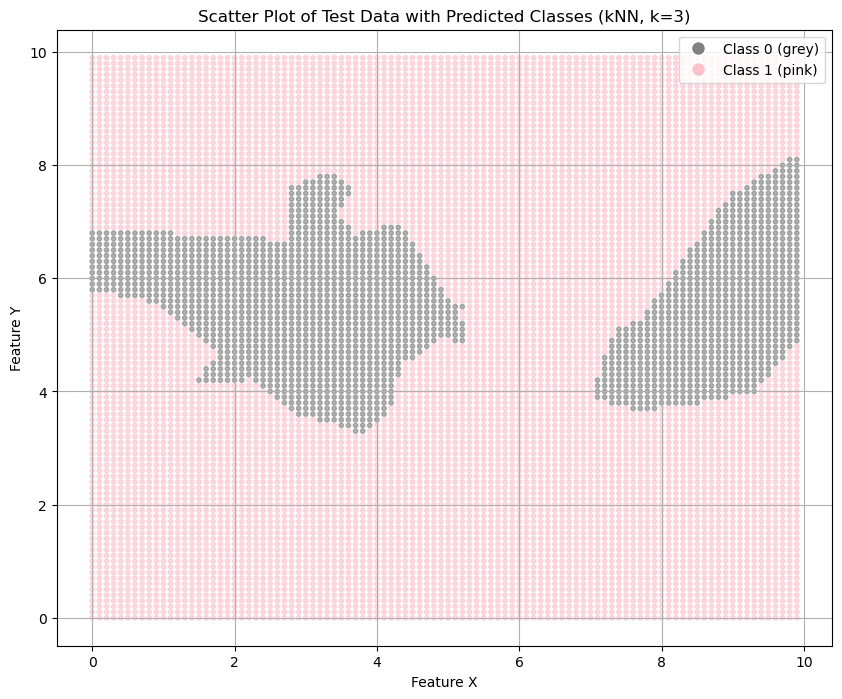

In [106]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat, Y_test_flat, c=test_colors, s=10, alpha=0.6)
plt.title("Scatter Plot of Test Data with Predicted Classes (kNN, k=3)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.grid(True)

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label='Class 0 (grey)'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Class 1 (pink)')])

plt.show()

In [107]:
def plot_knn_boundary(k, training_set, classes, test_set, X_test_flat, Y_test_flat):
    from sklearn.neighbors import KNeighborsClassifier
    import matplotlib.pyplot as plt
    import numpy as np

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(training_set, classes)

    predicted_classes = knn.predict(test_set)

    test_colors = np.where(predicted_classes == 0, 'grey', 'pink')

    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_flat, Y_test_flat, c=test_colors, s=10, alpha=0.6)
    plt.title(f"Scatter Plot of Test Data with Predicted Classes (kNN, k={k})")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.grid(True)

    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label='Class 0 (grey)'),
                        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Class 1 (pink)')])

    plt.show()


In [108]:
k_values = [1, 3, 5, 7, 10, 15]

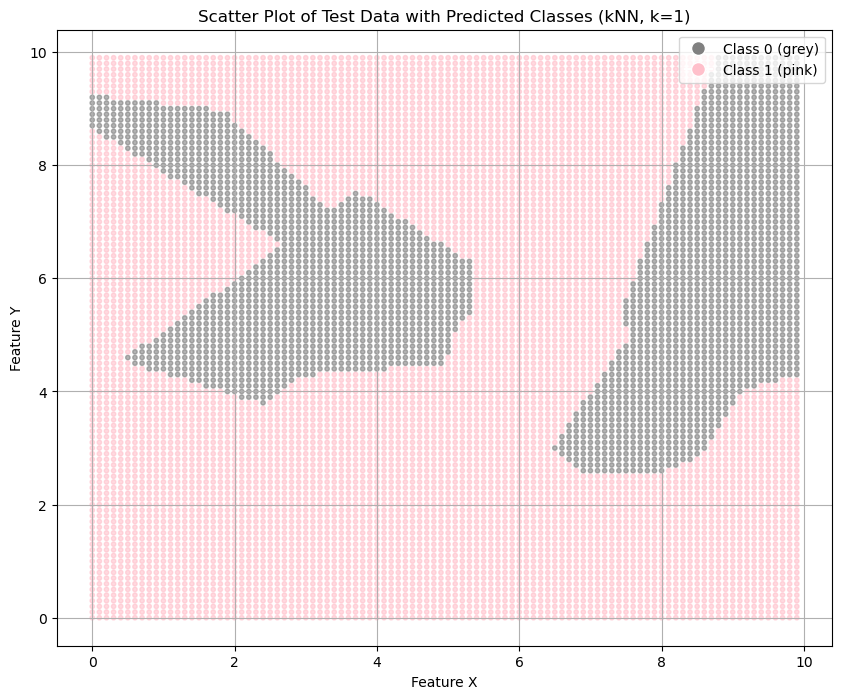

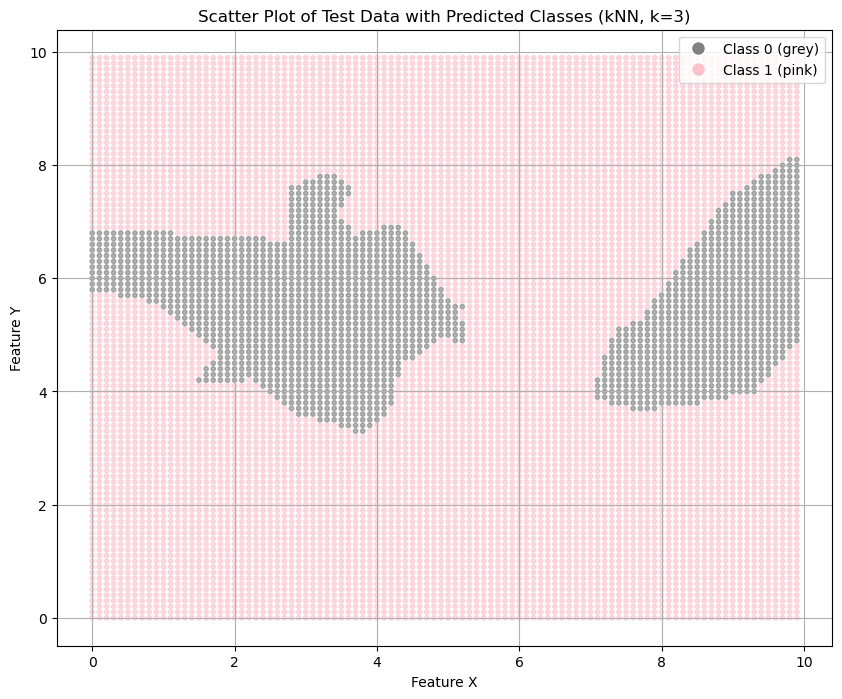

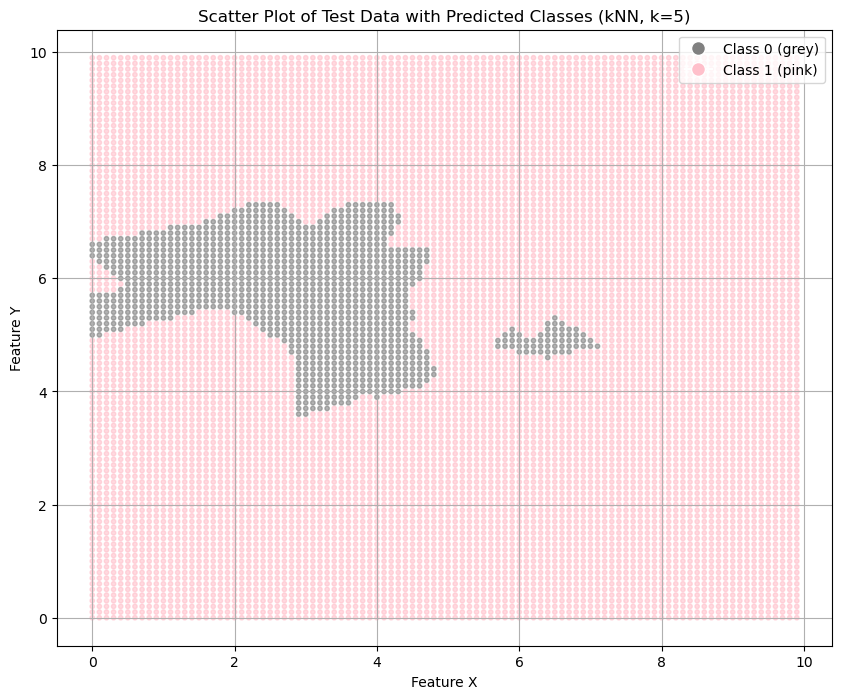

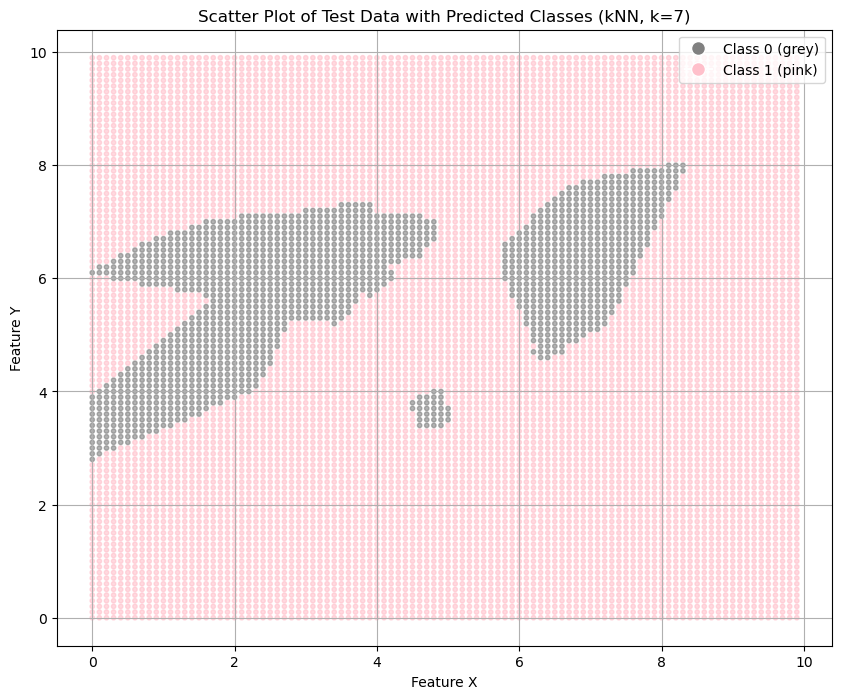

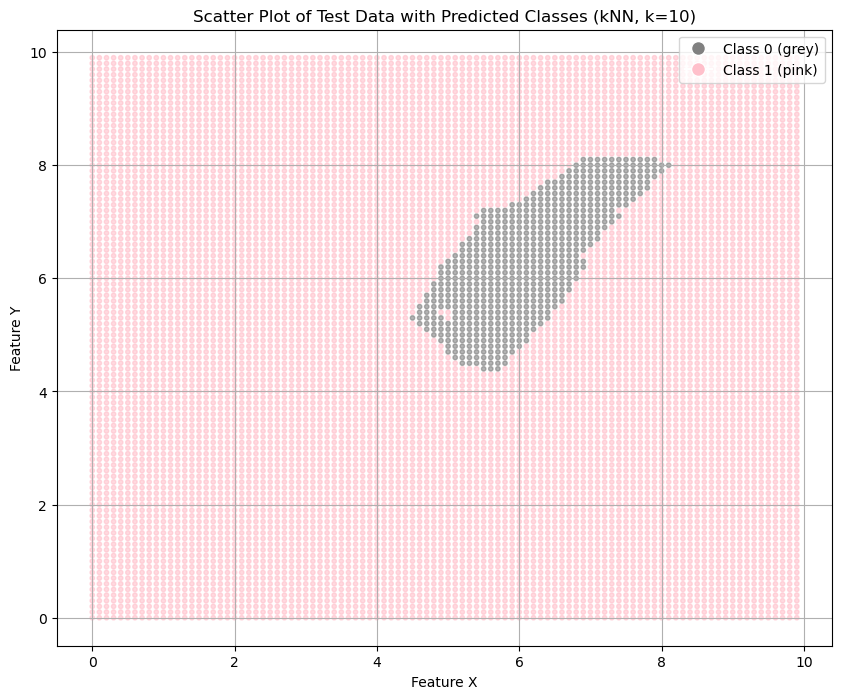

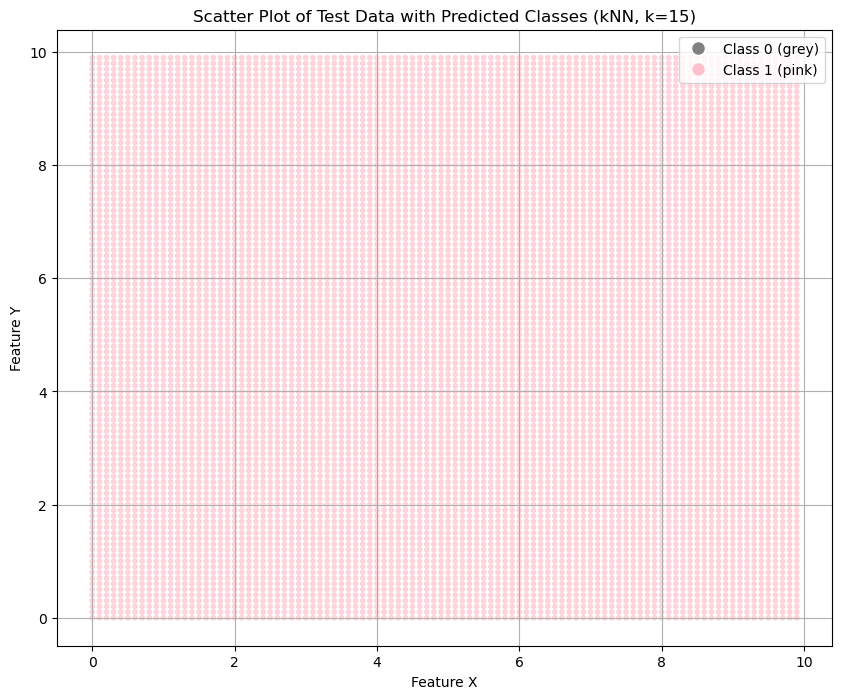

In [109]:
for k in k_values:
    plot_knn_boundary(k, training_set, classes, test_set, X_test_flat, Y_test_flat)

In [110]:
df.head()

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0               19.14                0.394962                0.883161   
1               18.50                0.530341                1.185878   
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   

   relative_velocity  miss_distance  is_hazardous  
0       71745.401048   5.814362e+07         False  
1      109949.757148   5.580105e+07          True  
2       24865.506798   6.720689e+07         False  
3       78890.076805   3.039644e+07         False  
4       56036.519484   6.311863e+07         False

In [111]:
feature1 = 'relative_velocity'
feature2 = 'absolute_magnitude' 

In [112]:
X = df[feature1].values
Y = df[feature2].values

In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
np.random.seed(42)

In [115]:
indices = np.random.choice(len(X), 20, replace=False)
X_sample = X[indices]
Y_sample = Y[indices]

In [116]:
classes = np.random.choice([0, 1], 20)

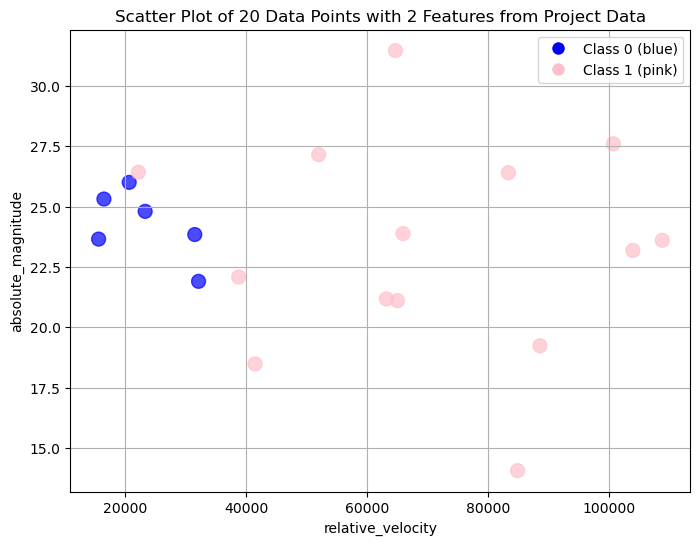

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(X_sample, Y_sample, c=colors, s=100, alpha=0.7)
plt.title("Scatter Plot of 20 Data Points with 2 Features from Project Data")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (blue)'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=10, label='Class 1 (pink)')])

plt.show()

In [118]:
x_test_values = np.arange(X.min(), X.max(), 0.5)
y_test_values = np.arange(Y.min(), Y.max(), 0.5)

In [119]:
X_test, Y_test = np.meshgrid(x_test_values, y_test_values)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()

In [120]:
test_set = np.c_[X_test_flat, Y_test_flat]

In [121]:
training_set = np.c_[X_sample, Y_sample]

In [122]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_set, classes)

KNeighborsClassifier(n_neighbors=3)

In [123]:
predicted_classes = knn.predict(test_set)

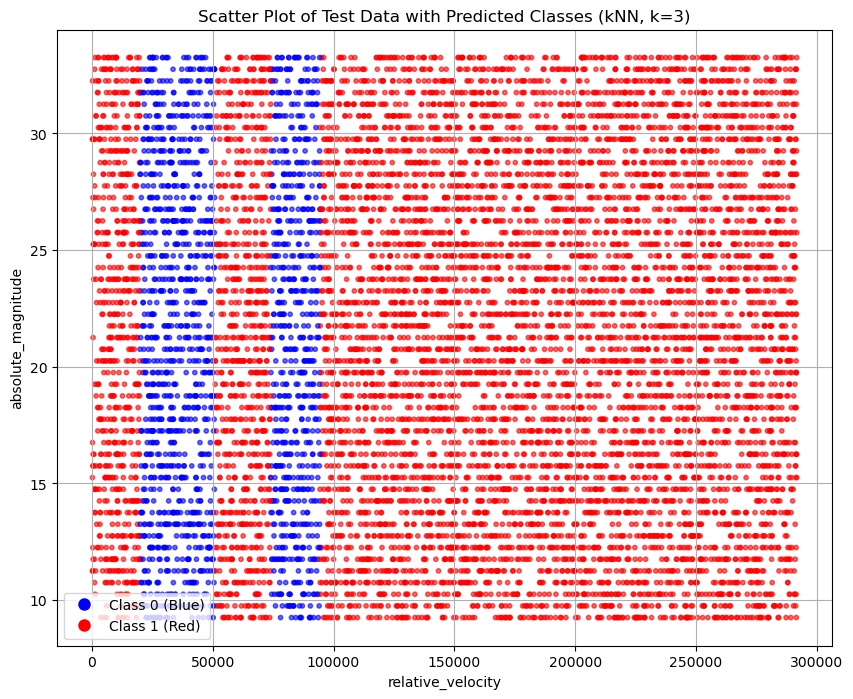

In [124]:
# Subsample the test set for plotting
sample_indices = np.random.choice(len(test_set), size=10000, replace=False)
test_set_sampled = test_set[sample_indices]
X_test_sampled = X_test_flat[sample_indices]
Y_test_sampled = Y_test_flat[sample_indices]
predicted_classes_sampled = predicted_classes[sample_indices]

# Assign colors based on predicted class: class 0 -> Blue, class 1 -> Red
test_colors_sampled = np.where(predicted_classes_sampled == 0, 'blue', 'red')

# Plot the subsampled data
plt.figure(figsize=(10, 8))
plt.scatter(X_test_sampled, Y_test_sampled, c=test_colors_sampled, s=10, alpha=0.6)
plt.title(f"Scatter Plot of Test Data with Predicted Classes (kNN, k=3)")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)

# Add a legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (Blue)'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 1 (Red)')])

plt.show()


In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [126]:
target = 'is_hazardous' 

In [127]:
X = df[[feature1, feature2]].values
y = df[target].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
param_grid = {'n_neighbors': np.arange(1, 31)}  # Testing k values from 1 to 30

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"The best k value found using GridSearchCV is: {best_k}")

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best k on the test set: {accuracy}")


The best k value found using GridSearchCV is: 30
Accuracy with best k on the test set: 0.8730926940819304


In [130]:
param_dist = {'n_neighbors': np.arange(1, 31)}  # Testing k values from 1 to 30

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

best_k = random_search.best_params_['n_neighbors']
print(f"The best k value found using RandomizedSearchCV is: {best_k}")

y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best k on the test set: {accuracy}")


The best k value found using RandomizedSearchCV is: 28
Accuracy with best k on the test set: 0.8730926940819304


In [131]:
df.head()

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0               19.14                0.394962                0.883161   
1               18.50                0.530341                1.185878   
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   

   relative_velocity  miss_distance  is_hazardous  
0       71745.401048   5.814362e+07         False  
1      109949.757148   5.580105e+07          True  
2       24865.506798   6.720689e+07         False  
3       78890.076805   3.039644e+07         False  
4       56036.519484   6.311863e+07         False

In [132]:
'''A1. If your project deals with a regression problem, please use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.'''

'A1. If your project deals with a regression problem, please use one attribute of your dataset\n(X_train) along with the target values (y_train) for training a linear regression model. Sample code\nsuggested below.'

In [133]:
X = df[['absolute_magnitude']] 
y = df['is_hazardous']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
reg = LinearRegression().fit(X_train, y_train)

In [137]:
y_train_pred = reg.predict(X_train)

In [138]:
y_test_pred = reg.predict(X_test)

In [139]:
print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Coefficients: [-0.03948774]
Intercept: 1.0334574193821506


In [140]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print(f"Training R^2 Score: {train_score}")
print(f"Testing R^2 Score: {test_score}")

Training R^2 Score: 0.11834420728638151
Testing R^2 Score: 0.11826799247142561


In [141]:
'''A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.
Perform prediction on the test data and compare the metric values between train and test set.'''

'A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.\nPerform prediction on the test data and compare the metric values between train and test set.'

In [142]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [143]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [144]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [145]:
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

In [146]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [147]:
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

print(f"Training MAPE: {mape_train}")
print(f"Test MAPE: {mape_test}")

print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")

Training MSE: 0.09837389625273421
Test MSE: 0.0973434225640746
Training RMSE: 0.313646132213892
Test RMSE: 0.3119990746205421
Training MAPE: 512103845077772.4
Test MAPE: 512833262107077.9
Training R2 Score: 0.11834420728638151
Test R2 Score: 0.11826799247142561


In [148]:
'''A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.'''

'A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.'

In [149]:
X = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']]
y = df['is_hazardous'].astype(int) 

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
clf = LogisticRegression().fit(X_train, y_train)

In [153]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [154]:
print(f"Coefficients: {clf.coef_}")
print(f"Intercept: {clf.intercept_}")

Coefficients: [[-1.29440376e-01  1.02323391e-03  2.28802057e-03  2.12840059e-05
  -7.39284634e-09]]
Intercept: [-0.00422974]


In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [156]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [157]:
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

In [158]:
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

In [159]:
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

In [160]:
roc_auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
roc_auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [161]:
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

print(f"Training Precision: {precision_train}")
print(f"Test Precision: {precision_test}")

print(f"Training Recall: {recall_train}")
print(f"Test Recall: {recall_test}")

print(f"Training F1 Score: {f1_train}")
print(f"Test F1 Score: {f1_test}")

print(f"Training ROC-AUC Score: {roc_auc_train}")
print(f"Test ROC-AUC Score: {roc_auc_test}")

Training Accuracy: 0.8698916225567023
Test Accuracy: 0.871072669475863
Training Precision: 0.34484590860786396
Test Precision: 0.32454361054766734
Training Recall: 0.018749097212191247
Test Recall: 0.01872001872001872
Training F1 Score: 0.035564566950708275
Test F1 Score: 0.035398230088495575
Training ROC-AUC Score: 0.7826540601646091
Test ROC-AUC Score: 0.7855489889913123


In [162]:
'''A4. Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering'''

'A4. Perform k-means clustering on your data. Please remove / ignore the target variable for\nperforming clustering'

In [163]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [164]:
X = df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']]

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

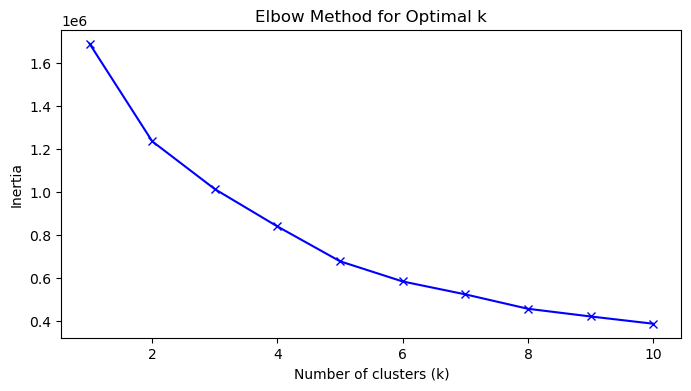

In [167]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [168]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [169]:
df['cluster'] = kmeans.labels_

In [170]:
print(df.head())

   absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0               19.14                0.394962                0.883161   
1               18.50                0.530341                1.185878   
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   

   relative_velocity  miss_distance  is_hazardous  cluster  
0       71745.401048   5.814362e+07         False        1  
1      109949.757148   5.580105e+07          True        1  
2       24865.506798   6.720689e+07         False        1  
3       78890.076805   3.039644e+07         False        1  
4       56036.519484   6.311863e+07         False        1  


In [171]:
'''A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index'''

'A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index'

In [172]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [176]:
kmeans.fit(X_train) 

KMeans(n_clusters=3, random_state=42)

In [178]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Number of labels: {len(kmeans.labels_)}")

Shape of X_train: (270536, 5)
Number of labels: 270536


In [182]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(X_train, kmeans.labels_)

print(f"Silhouette score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz score: {calinski_harabasz_avg:.4f}")
print(f"Davies-Bouldin index: {davies_bouldin_avg:.4f}")

Silhouette score: 0.5843
Calinski-Harabasz score: 1012499.2822
Davies-Bouldin index: 0.5058


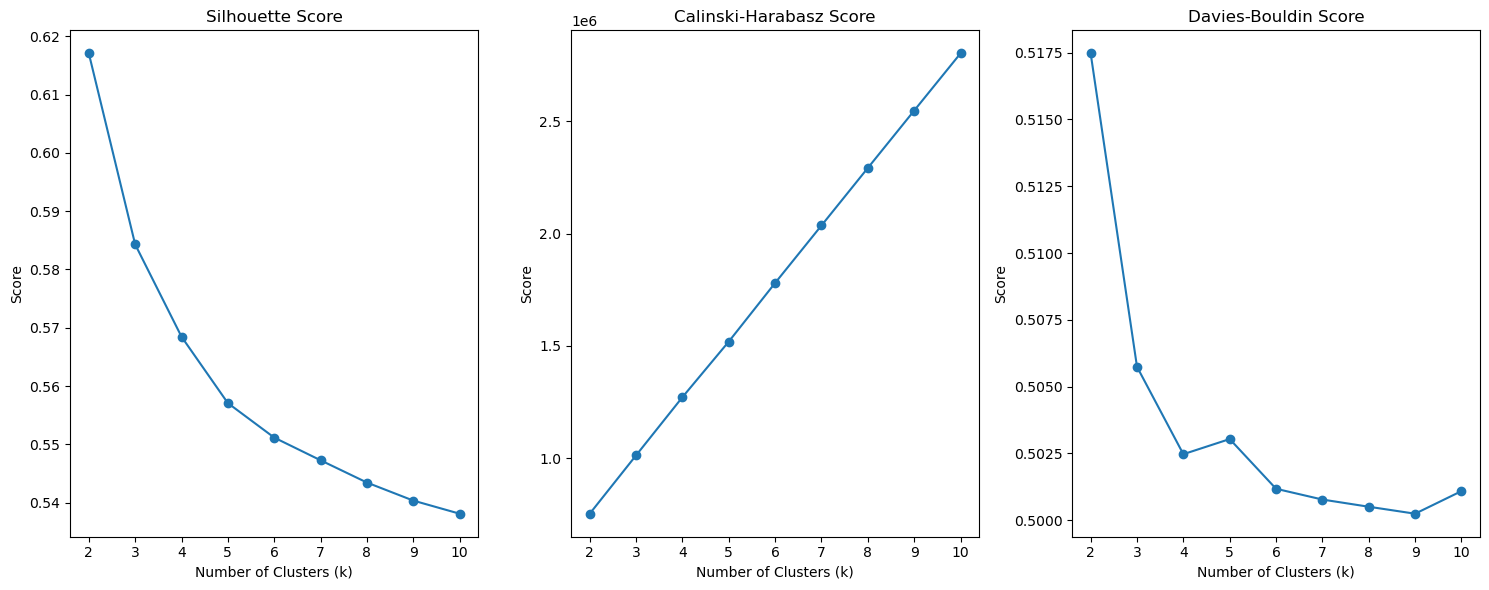

In [184]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Assuming X_train is a NumPy array
k_values = range(2, 11)  # Cluster values from 2 to 10

# Lists to store the scores
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    clusters = kmeans.labels_
    
    # Calculate the scores
    silhouette_avg = silhouette_score(X_train, clusters)
    calinski_harabasz_avg = calinski_harabasz_score(X_train, clusters)
    davies_bouldin_avg = davies_bouldin_score(X_train, clusters)
    
    # Append the scores to the lists
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plotting the scores
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


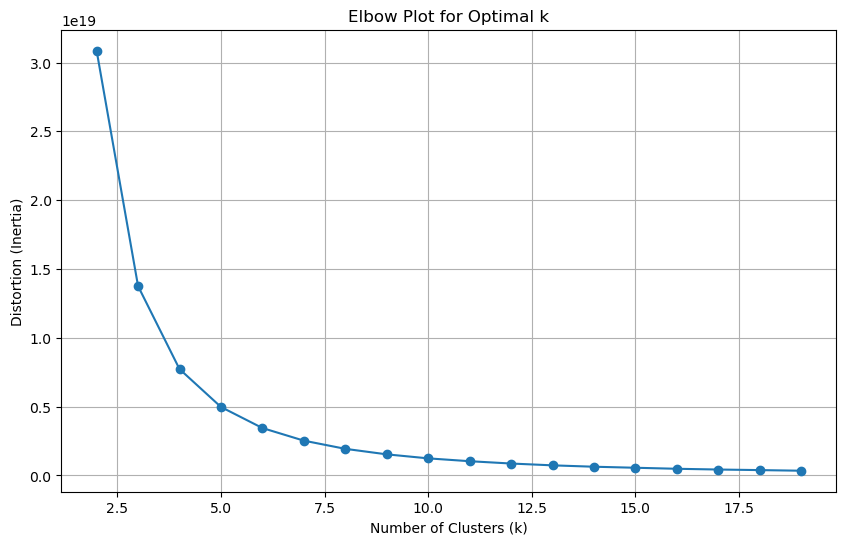

In [186]:
#QUESTION A7

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store the distortions
distortions = []

# Loop over different values of k to calculate the distortions (inertia)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()


In [188]:
def sum_unit(inputs, weights, bias):
    #sum of inputs * their weights, + bias
    total = 0
    for i in range(len(inputs)):
        total += inputs[i] * weights[i]
    return total + bias

#(b)
def step(val): #step func
    return 1 if val > 0 else 0

def bipolar_step(val): #bipolar step func
    return 1 if val > 0 else -1

def sigmoid(val): #sigmoid func
    return 1 / (1 + (2.71828 ** -val))

def tanh(val): #tanh funct
    return (2 / (1 + (2.71828 ** (-2 * val)))) - 1

def relu(val):  #relu func
    return max(0, val)

def leaky_relu(val):  #leaky relu func
    return val if val > 0 else 0.01 * val

#(c)
def error_comparator(predicted, actual):
    return actual - predicted

final weights: [-0.1   0.1   0.05]
no. of epochs: 129


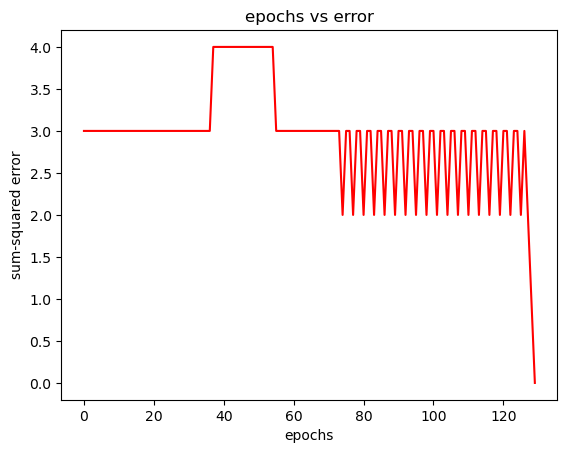

In [190]:
def perceptron_train(X, y, W0, W1, W2, alpha, max_epochs=1000, threshold=0.002):
    epochs = 0
    error_history = []
    weights = np.array([W0, W1, W2])
    
    while epochs < max_epochs:
        total_error = 0
        for i in range(len(X)):
            #input with bias
            inputs = np.append(1, X[i])
            weighted_sum = np.dot(inputs, weights)
            output = step(weighted_sum)
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights = weights + alpha * error * inputs
        
        error_history.append(total_error)
        
        #check convergence
        if total_error <= threshold:
            break
        
        epochs += 1
    
    return weights, epochs, error_history

#AND gate ip and op
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initialize weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
alpha = 0.05

#train perceptron
final_weights, epochs, error_history = perceptron_train(X, y, W0, W1, W2, alpha)

print("final weights:", final_weights)
print("no. of epochs:", epochs)

#plot
plt.plot(range(epochs + 1), error_history, color='red')
plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.title('epochs vs error')
plt.show()


step activation:
final weights: [-0.1   0.1   0.05]
epochs: 130
----------------------------------------
bipolar step activation:
final weights: [-0.1   0.1   0.05]
epochs: 1000
----------------------------------------
sigmoid activation:
final weights: [-6.13531536  3.97083463  3.96394977]
epochs: 1000
----------------------------------------
relu activation:
final weights: [-0.92774472  0.95116001  0.94981086]
epochs: 390
----------------------------------------
leaky relu activation:
final weights: [-0.92927378  0.9530528   0.95175339]
epochs: 433
----------------------------------------


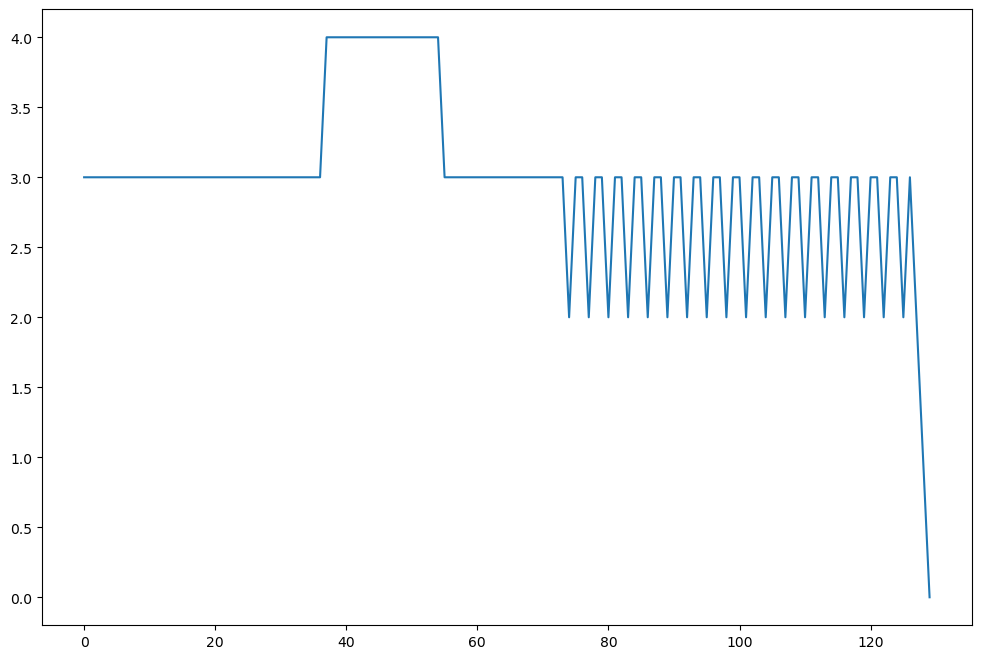

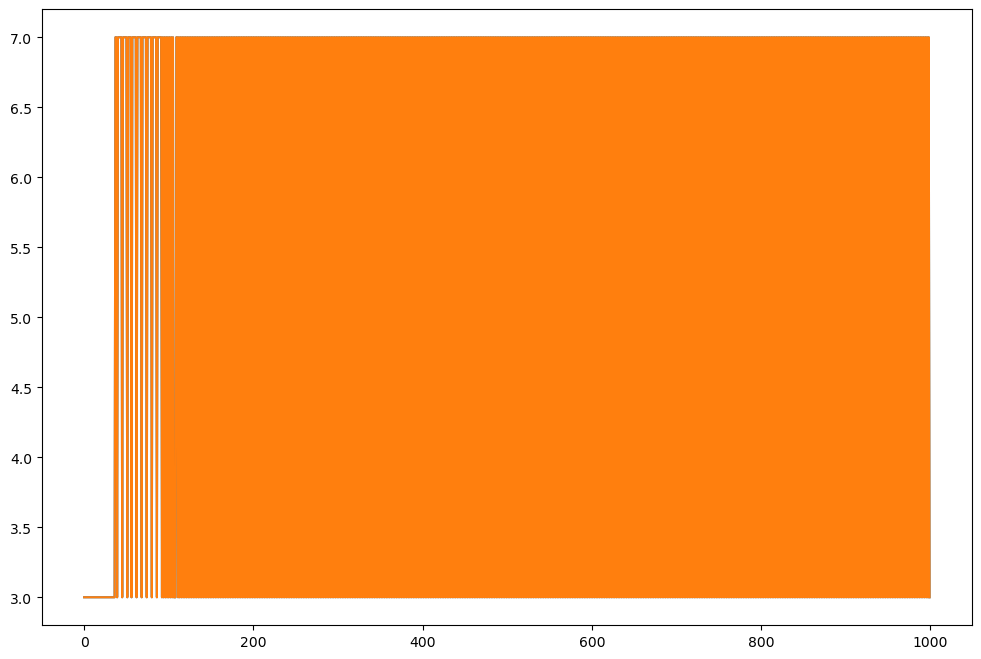

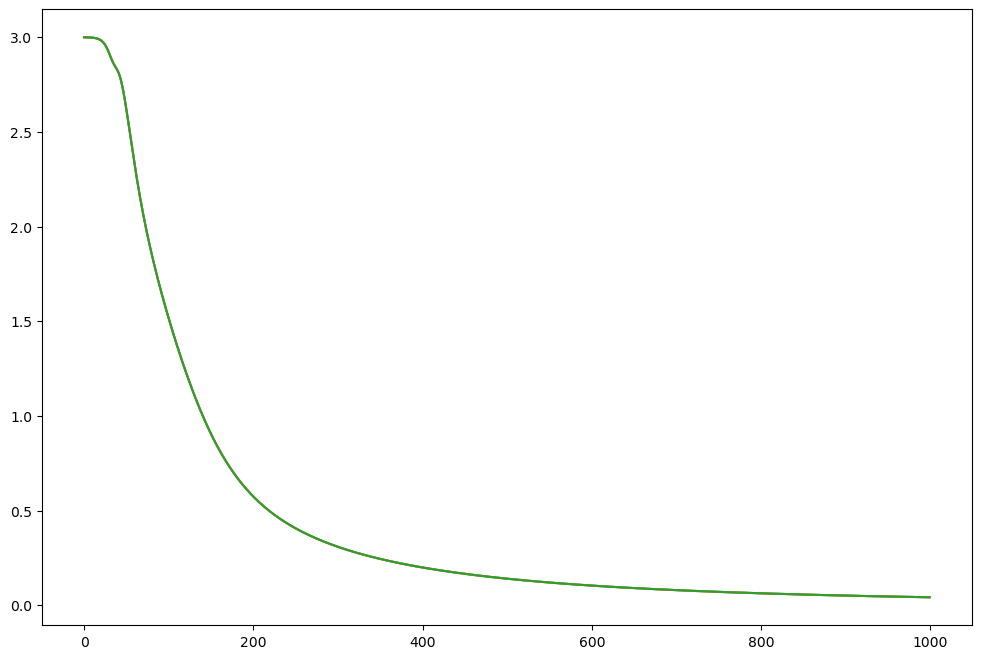

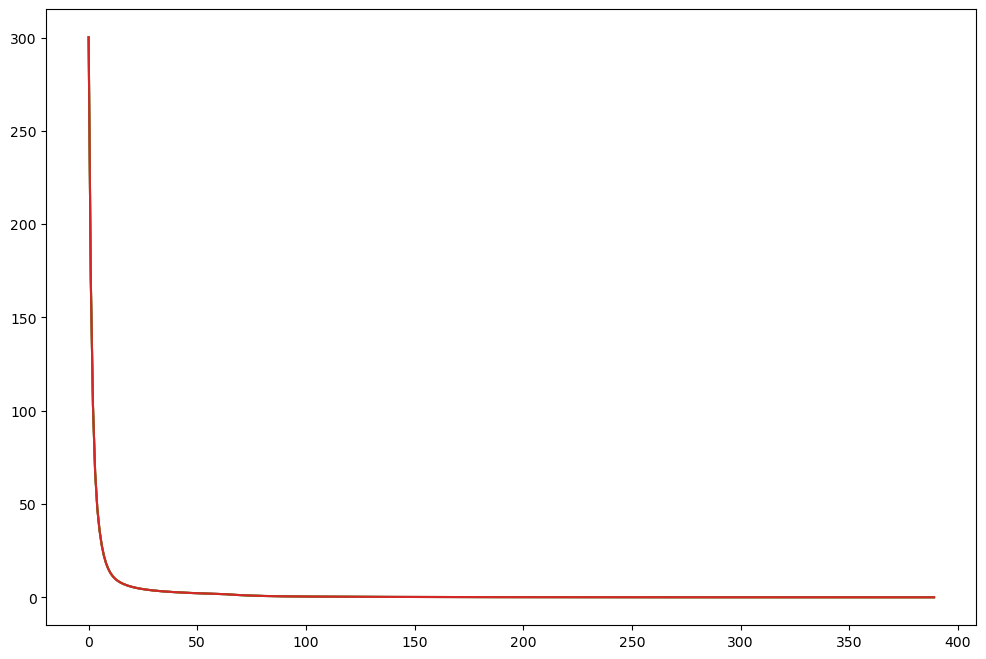

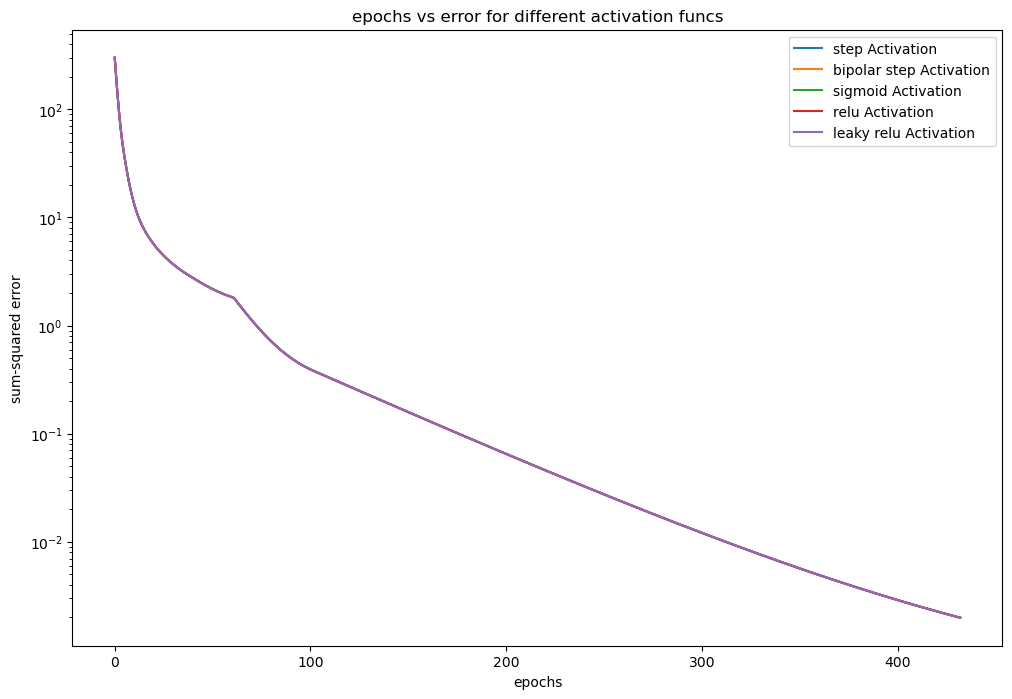

In [192]:
#QUESTION A3

def train_perceptron(X, y, act_func, w0, w1, w2, lr, max_epochs=1000, error_threshold=0.002):
    errors = []
    weights = np.array([w0, w1, w2])
    
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            #add bias input
            inputs = np.append(1, X[i])
            #weighted sum
            weighted_sum = np.dot(inputs, weights)
            #activation function
            output = act_func(weighted_sum)
            #calculate error
            error = y[i] - output
            total_error += error ** 2
            #update weights
            weights += lr * error * inputs
        
        errors.append(total_error)
        
        #stop if error below threshold
        if total_error <= error_threshold:
            break
    
    return weights, epoch + 1, errors

#AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

#initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
lr = 0.05

#train perceptron with different activation funcs
act_funcs = {
    "step": step,
    "bipolar step": bipolar_step,
    "sigmoid": sigmoid,
    "relu": relu,
    "leaky relu": leaky_relu
}

results = {}

for name, func in act_funcs.items():
    final_weights, epochs, error_history = train_perceptron(X, y, func, w0, w1, w2, lr)
    results[name] = {
        "final_weights": final_weights,
        "epochs": epochs,
        "error_history": error_history
    }
    print(f"{name} activation:")
    print(f"final weights: {final_weights}")
    print(f"epochs: {epochs}")
    print("-" * 40)

    plt.figure(figsize=(12, 8))

    # Plotting the error history
    for name, result in results.items():
        plt.plot(range(len(error_history)), error_history, label=f'{name} Activation')

plt.xlabel('epochs')
plt.ylabel('sum-squared error')
plt.yscale('log')
plt.title('epochs vs error for different activation funcs')
plt.legend()
plt.show()



Testing learning rate: 0.1
Iteration 0, Weights: [ 0.1   0.05 -0.05], Error: 0.47502081252106
Iteration 1, Weights: [ 0.1         0.09750208 -0.00249792], Error: 0.45140286062111523
Iteration 2, Weights: [0.1        0.14264237 0.04264237], Error: 0.429158631982389
Iteration 3, Weights: [0.1        0.18555823 0.08555823], Error: 0.4082712727946436
Iteration 4, Weights: [0.1        0.22638536 0.12638536], Error: 0.3887022058981765
Iteration 5, Weights: [0.1        0.26525558 0.16525558], Error: 0.3703976767255298
Iteration 6, Weights: [0.1        0.30229535 0.20229535], Error: 0.3532941194220418
Iteration 7, Weights: [0.1        0.33762476 0.23762476], Error: 0.3373223847607504
Iteration 8, Weights: [0.1      0.371357 0.271357], Error: 0.3224109535413109
Iteration 9, Weights: [0.1        0.40359809 0.30359809], Error: 0.30848829357201935
Iteration 10, Weights: [0.1        0.43444692 0.33444692], Error: 0.2954845225132515
Iteration 11, Weights: [0.1        0.46399537 0.36399537], Error: 

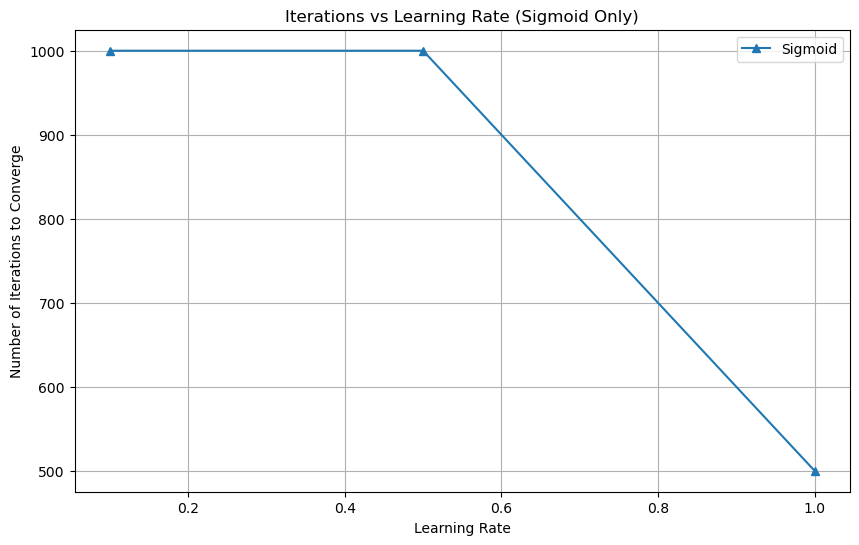

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid activation function
def sigmoid(val):
    return 1 / (1 + np.exp(-val))

# Inputs and target
inputs = np.array([1, 1])  # Simplified inputs
target = 1  # Expected output target
initial_weights = [0.1, 0.05, -0.05]  # Small initial weights
learning_rates = [0.1, 0.5, 1]  # Test only 3 learning rates

# Learning function for sigmoid
def learn_sigmoid(inputs, initial_weights, learning_rate, target, max_iters=1000, tolerance=0.001):
    w = np.array(initial_weights)  # Start with initial weights
    iterations = 0
    
    for i in range(max_iters):
        weighted_sum = w[0] + w[1] * inputs[0] + w[2] * inputs[1]
        prediction = sigmoid(weighted_sum)
        error = target - prediction
        
        # Print weights and error to debug
        print(f"Iteration {i}, Weights: {w}, Error: {error}")
        
        if abs(error) < tolerance:  # Convergence condition
            break
        
        # Update weights with learning rate
        w[1] += learning_rate * error * inputs[0]
        w[2] += learning_rate * error * inputs[1]
        
        iterations += 1
    
    return iterations

# Store iterations for each learning rate
iterations_dict = []

# Perform learning with different learning rates
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")
    iterations = learn_sigmoid(inputs, initial_weights, lr, target)
    iterations_dict.append(iterations)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, iterations_dict, label='Sigmoid', marker='^')

plt.title('Iterations vs Learning Rate (Sigmoid Only)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.legend()
plt.grid(True)
plt.show()
